In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator


In [2]:
# loading data from log file
f=open('test.txt', encoding='gbk')
txts=[]
for line in f:
    data = line.strip()
    if data[0:13] == "[drone debug]":
        txts.append(data[14:])
#         print(data[14:])

In [3]:
phi = []
p = []
say = []

say_x = []
say_y = []

for txt in txts:
    oneline = txt.split(':')
    if oneline[0] == "phi":
        phi.append((float(oneline[1]))) 
    elif oneline[0] == "p":
        p.append((float(oneline[1]))) 
    elif oneline[0] == "say":
        say.append((float(oneline[1]))) 
    elif oneline[0] == "x":
        say_x.append((float(oneline[1]))) 
    elif oneline[0] == "y":
        say_y.append((float(oneline[1])))    
        
print(len(phi))
print(len(p))
print(len(say))
print(len(say_x))
print(len(say_y))
phi_kalman

0
0
0
4981
4980


In [11]:
t = np.arange(0, 0.003333*(len(say_y)-1), 0.003333)

print(len(t))

4979


In [12]:
# simulate the Butterworth
y0 = 0
y1 = 0
y2 = 0

a0 = 0.0095257623
a1 = 0.0190515247
a2 = a0
b1 = -1.705552145
b2 = 0.743655195

result = []

for i in range(0,len(say_x)):
    y2 = y1
    y1 = y0
    if i == 0:
        y0 = a0*(float(say_x[0]))
    elif i == 1:
        y0 = a0*(float(say_x[1])) + a1*(float(say_x[0])) - b1*(float(result[0]))
    else:
        y0 = a0*(float(say_x[i])) + a1*(float(say_x[i-1])) + a2*(float(say_x[i-2])) - b1*(float(result[i-1])) - b2*(float(result[i-2]))

    result.append(float((int(y0))))
#     float((int(y0)))
    
print(len(result))
print(result)

4981
[0.0, 0.0, 1.0, 3.0, 6.0, 9.0, 12.0, 16.0, 21.0, 25.0, 27.0, 28.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 26.0, 25.0, 23.0, 22.0, 21.0, 19.0, 18.0, 19.0, 21.0, 23.0, 25.0, 26.0, 25.0, 24.0, 23.0, 21.0, 19.0, 18.0, 17.0, 15.0, 13.0, 12.0, 13.0, 16.0, 20.0, 24.0, 29.0, 35.0, 41.0, 46.0, 50.0, 53.0, 56.0, 59.0, 62.0, 67.0, 74.0, 81.0, 88.0, 95.0, 102.0, 109.0, 116.0, 123.0, 132.0, 141.0, 147.0, 150.0, 150.0, 147.0, 144.0, 142.0, 139.0, 133.0, 123.0, 110.0, 96.0, 83.0, 71.0, 59.0, 48.0, 38.0, 29.0, 22.0, 17.0, 12.0, 6.0, 0.0, -7.0, -15.0, -23.0, -31.0, -40.0, -49.0, -57.0, -64.0, -71.0, -77.0, -81.0, -82.0, -81.0, -78.0, -73.0, -65.0, -55.0, -44.0, -31.0, -16.0, 0.0, 17.0, 33.0, 47.0, 59.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 128.0, 136.0, 145.0, 155.0, 165.0, 174.0, 181.0, 187.0, 193.0, 198.0, 201.0, 203.0, 204.0, 204.0, 202.0, 197.0, 189.0, 179.0, 167.0, 154.0, 141.0, 129.0, 119.0, 110.0, 100.0, 89.0, 79.0, 69.0, 57.0, 44.0, 30.0, 15.0, 0.0, -14.0, -27.0, -40.0, -52.0, -62.0, -71.0,

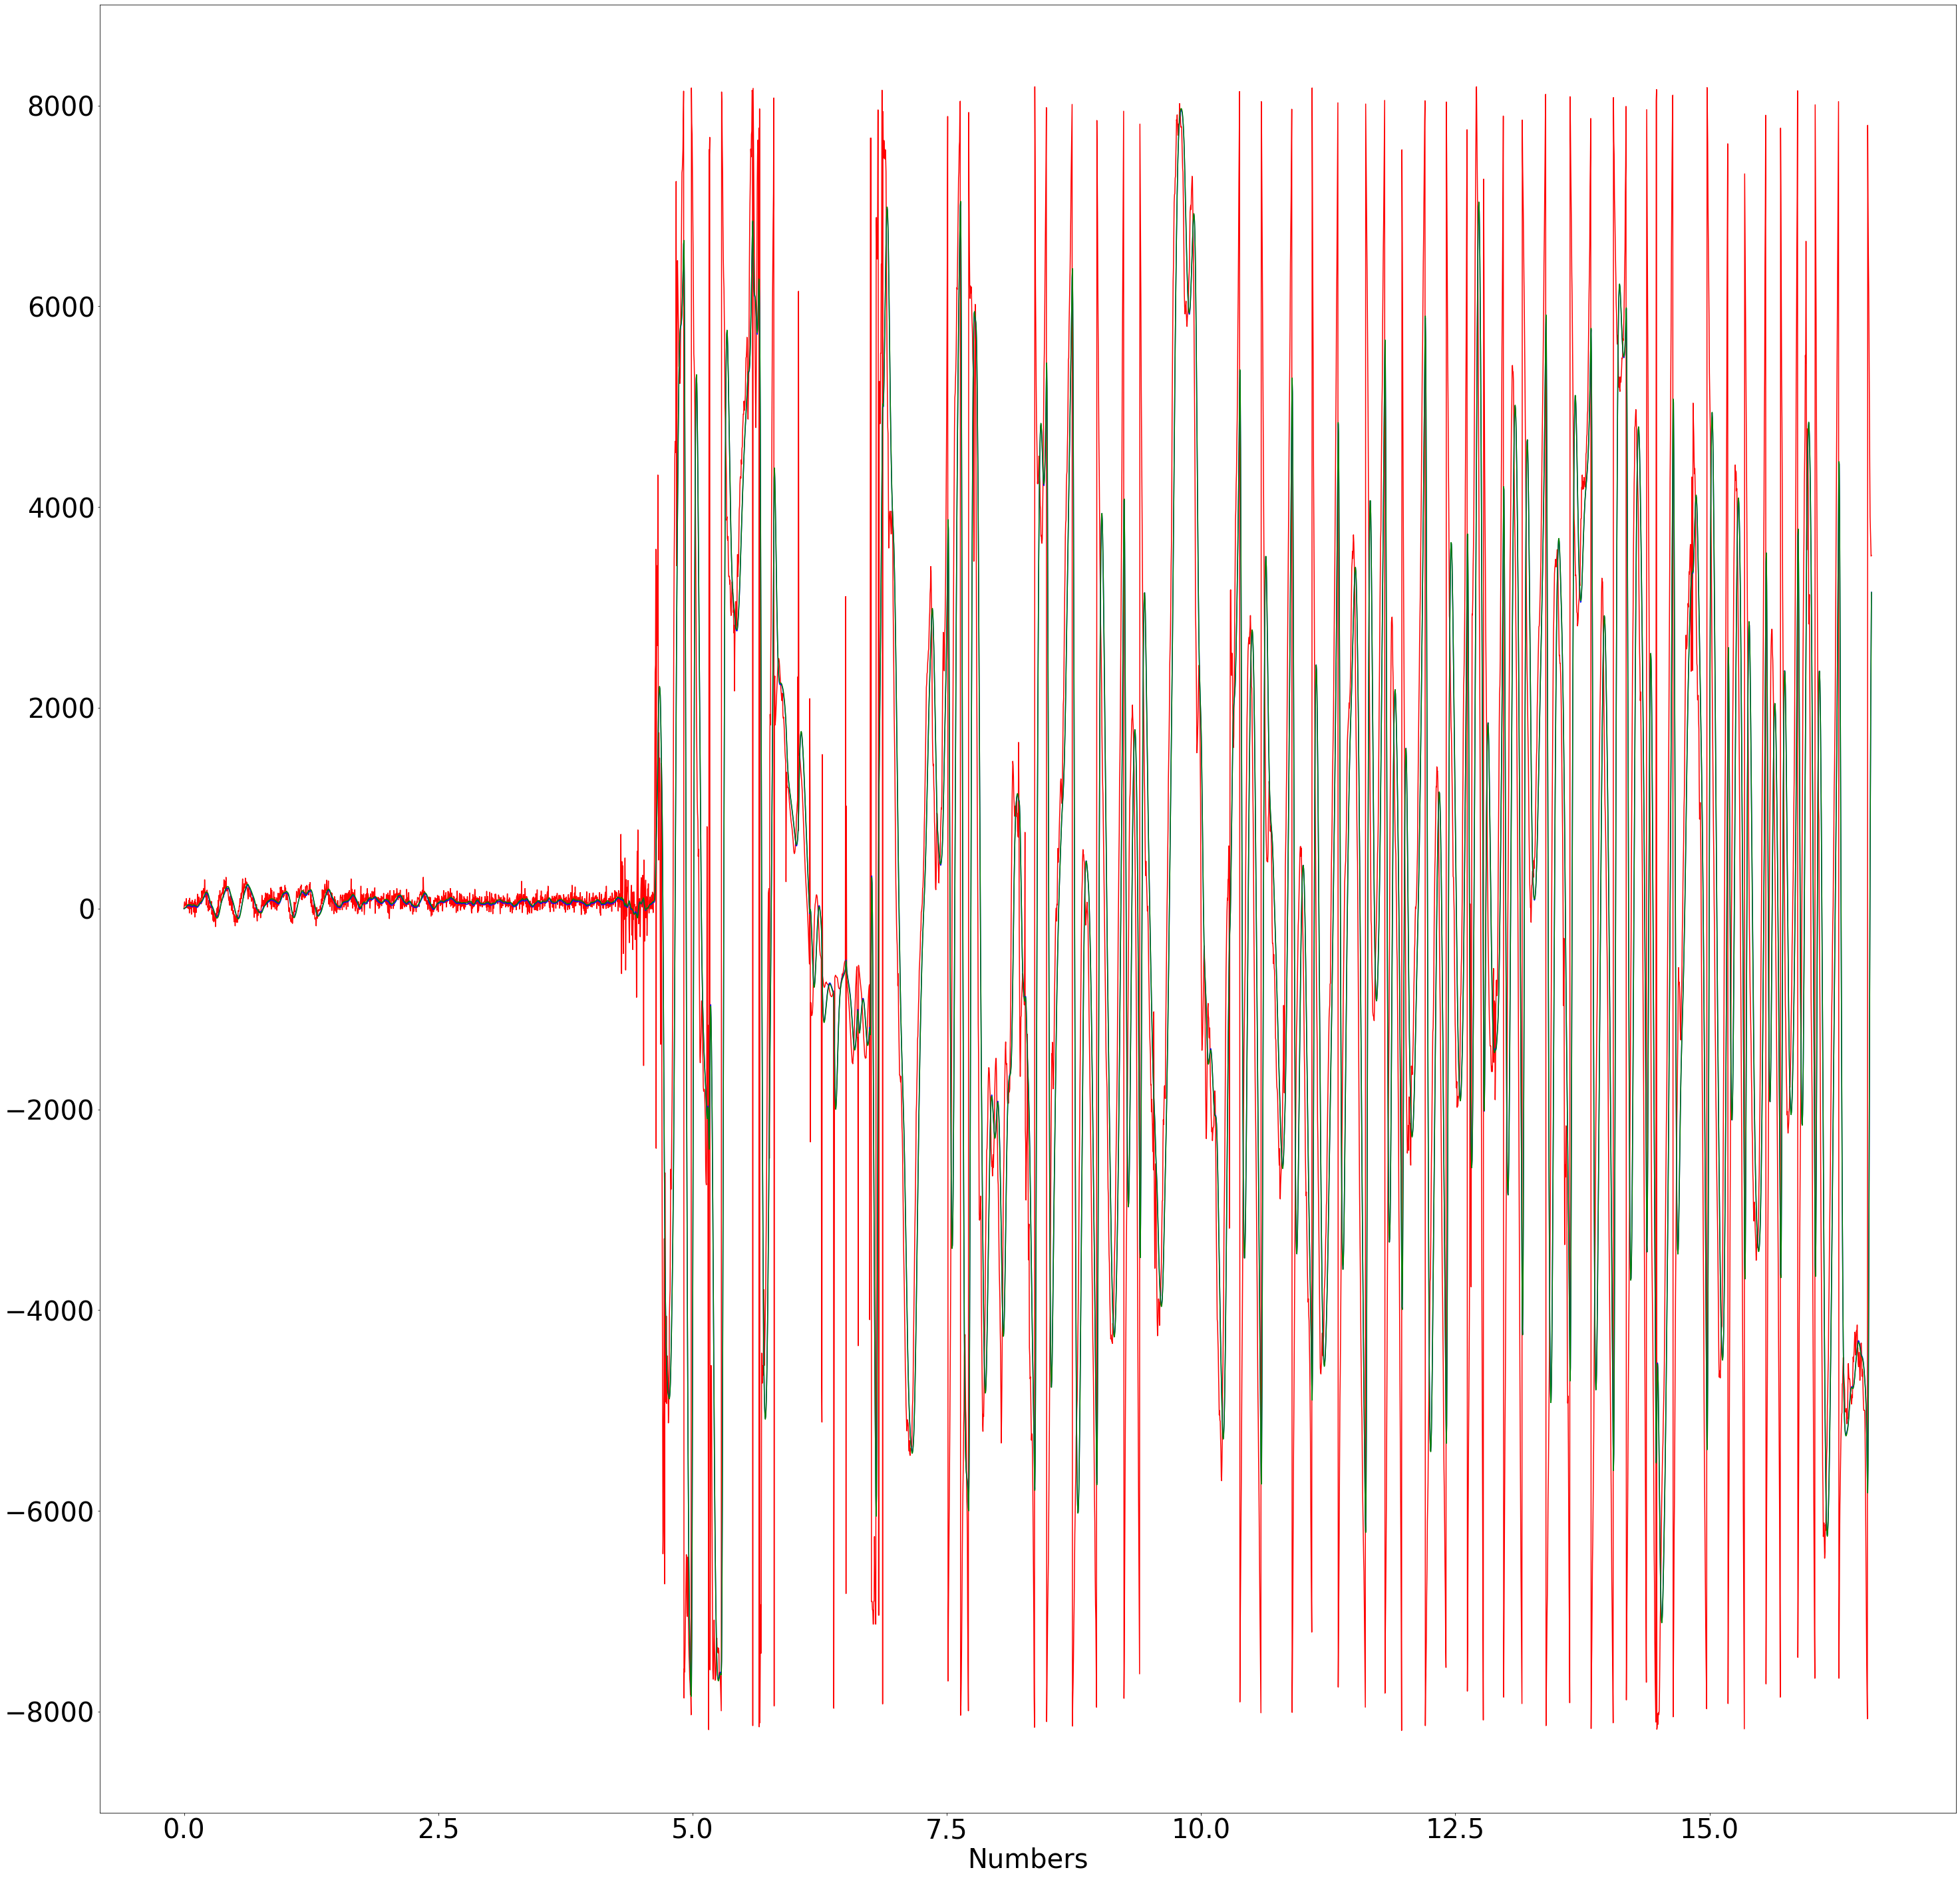

In [14]:
plt.figure(figsize=(50,50))

y_major_locator=MultipleLocator(2000)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)

plt.tick_params(axis='both',which='major',labelsize=40)
plt.xlabel('Numbers',fontsize=40)

plt.plot(t,say_x[0:len(t)], 'r')
plt.plot(t,result[0:len(t)], 'b')
plt.plot(t,say_y[0:len(t)], 'g')

plt.show()

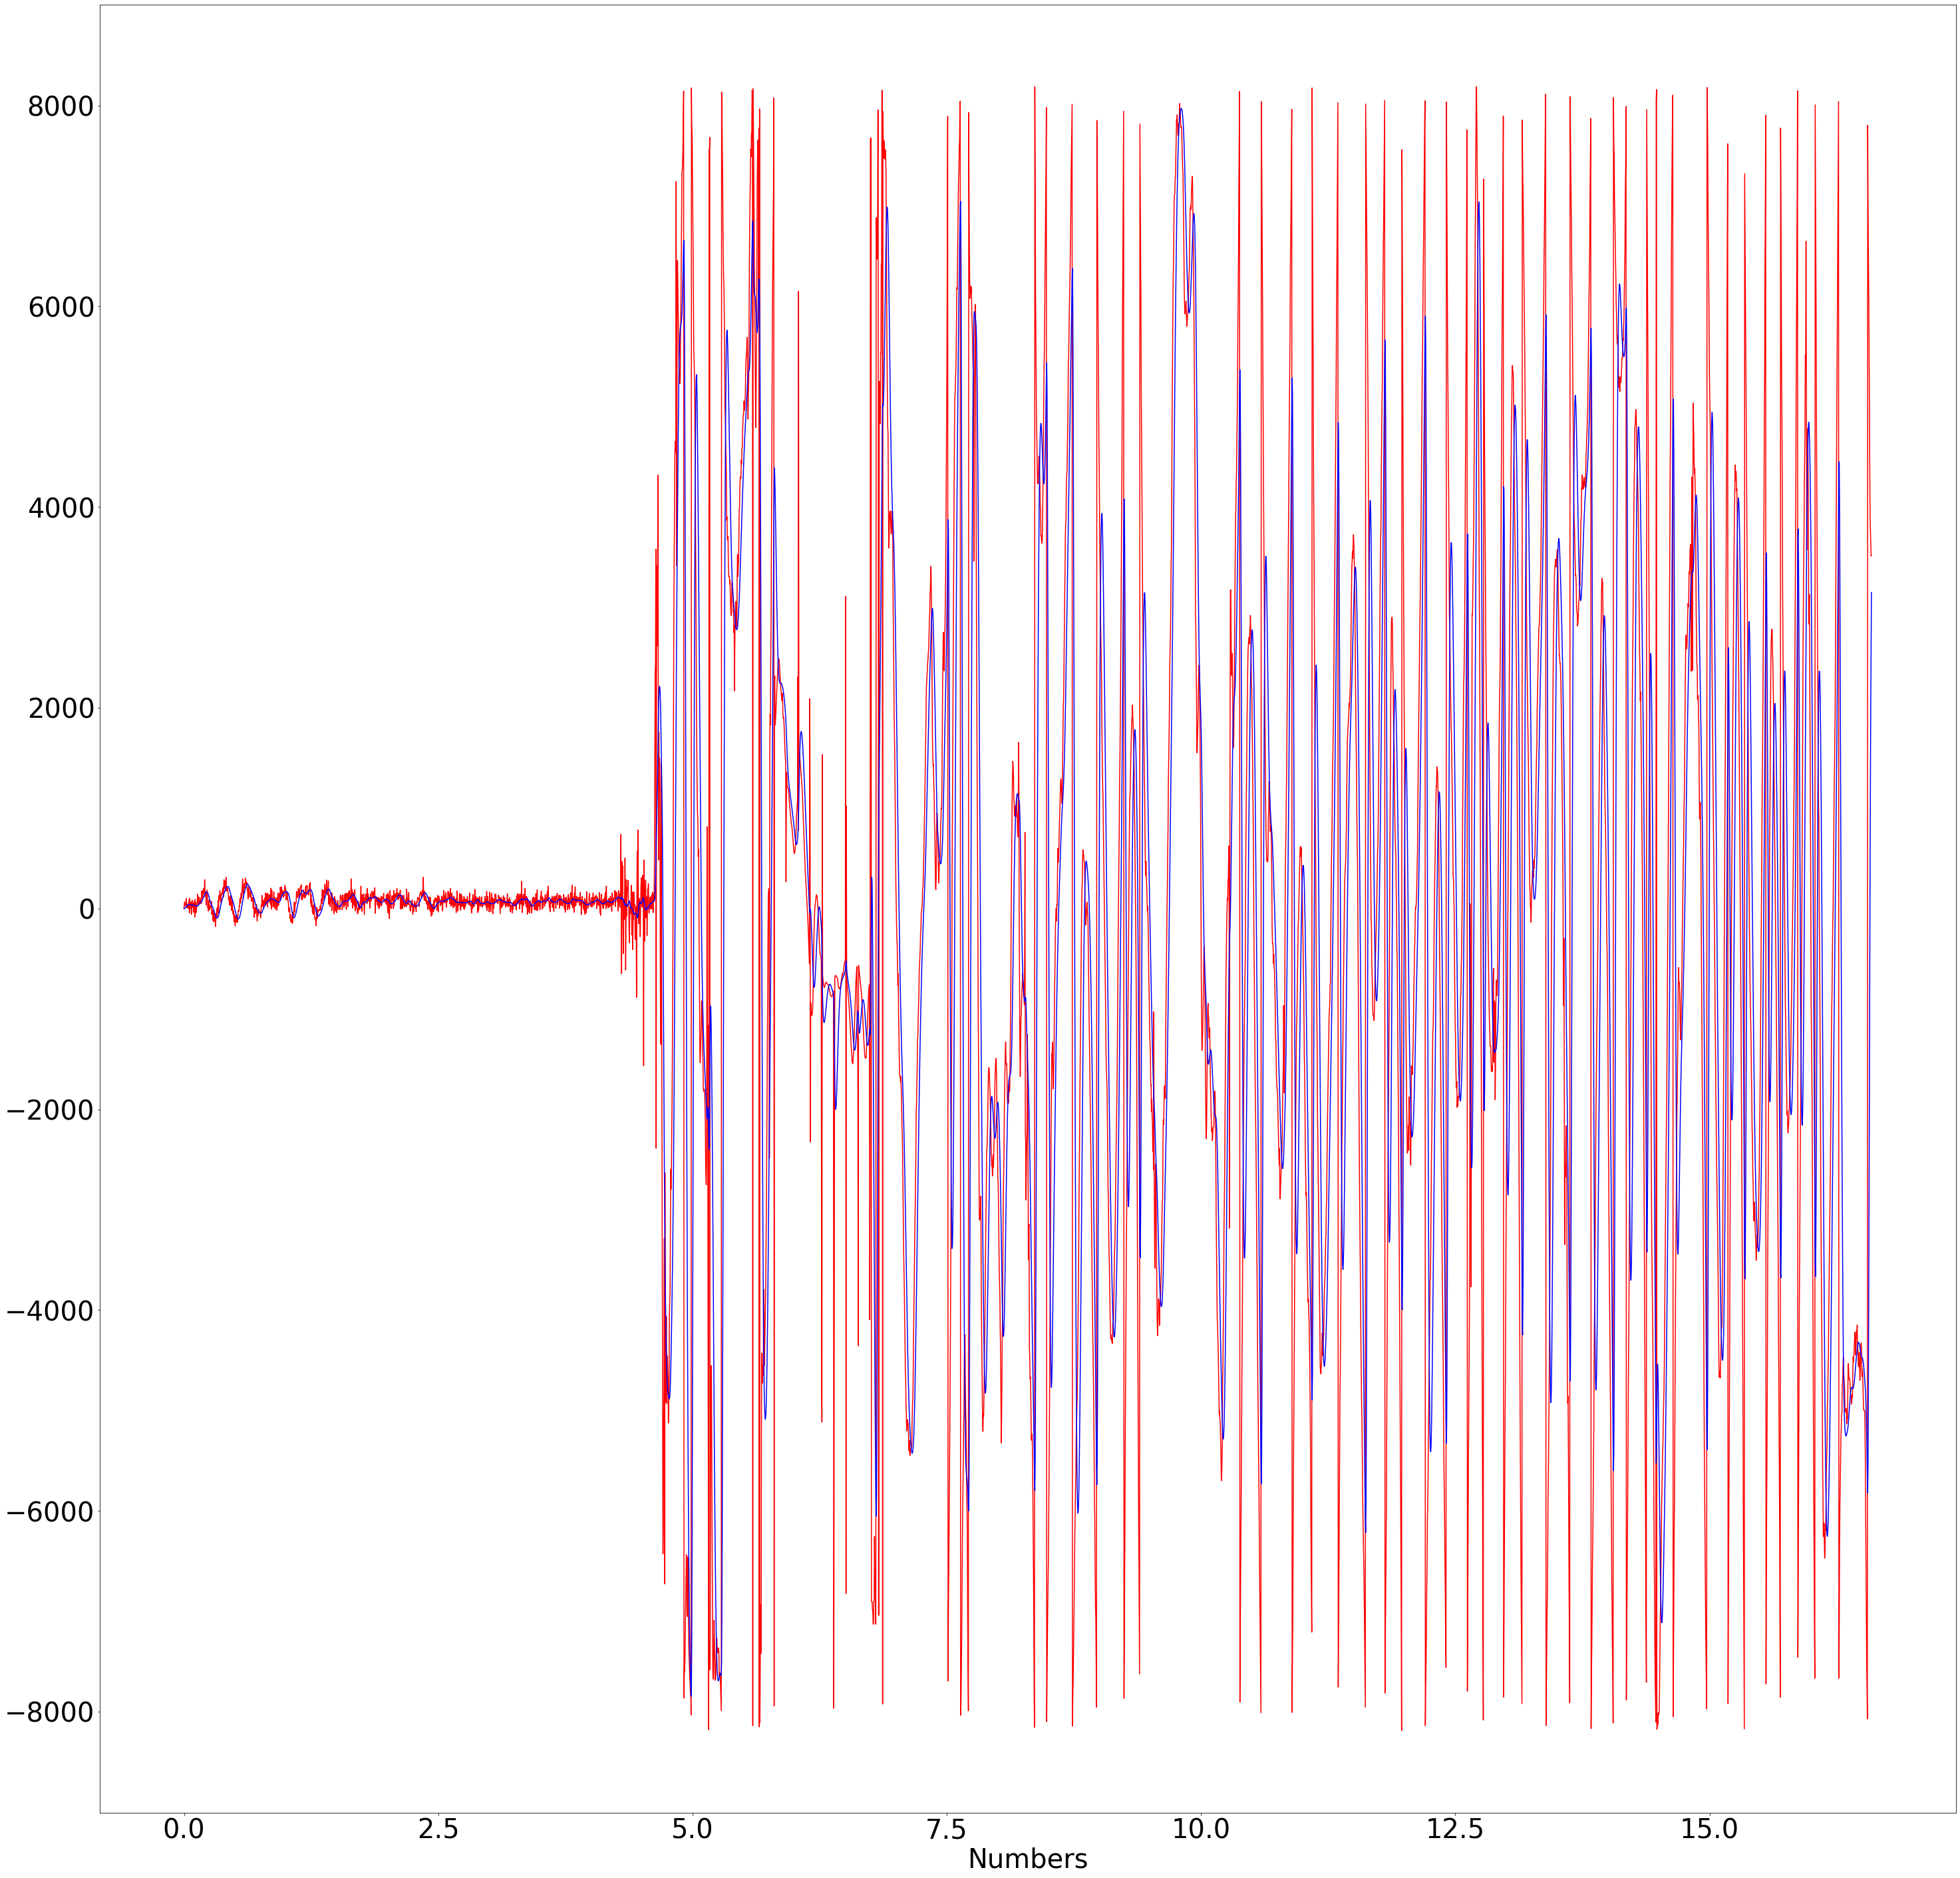

In [15]:
plt.figure(figsize=(50,50))

y_major_locator=MultipleLocator(2000)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)

plt.tick_params(axis='both',which='major',labelsize=40)
plt.xlabel('Numbers',fontsize=40)

plt.plot(t,say_x[0:len(t)], 'r')
plt.plot(t,say_y[0:len(t)], 'b')
plt.show()

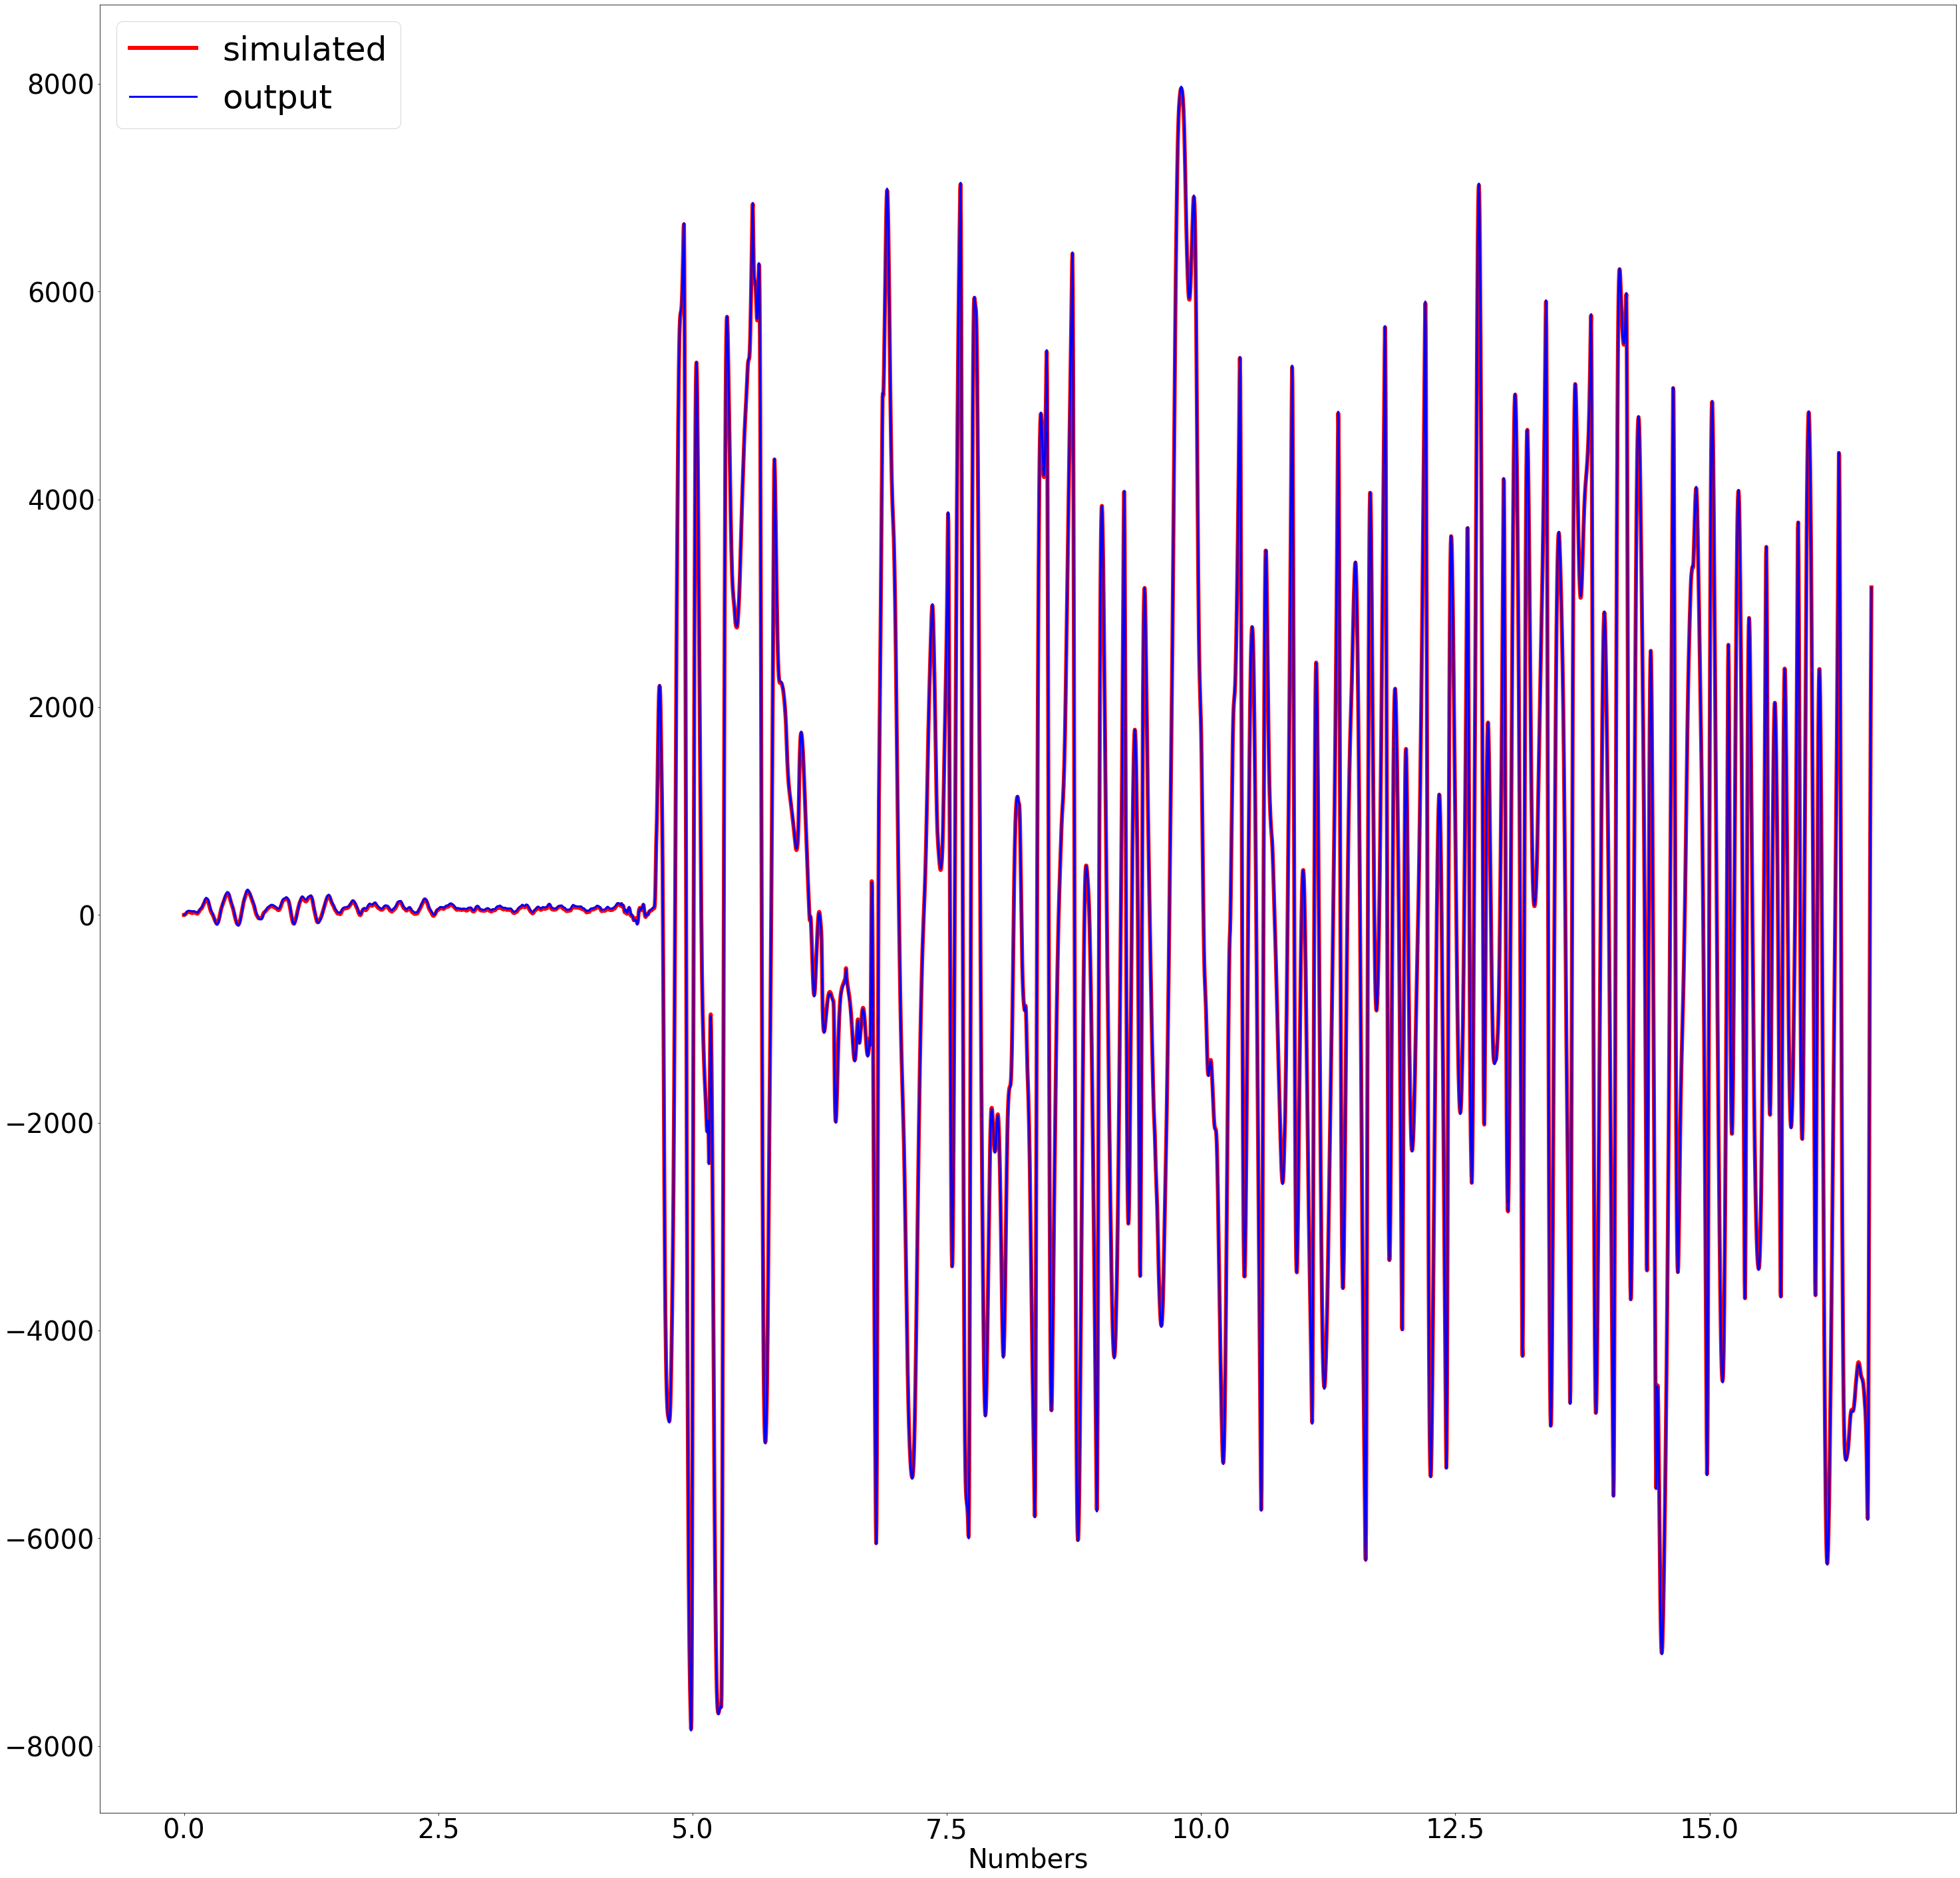

In [16]:
plt.figure(figsize=(50,50))

y_major_locator=MultipleLocator(2000)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)

plt.tick_params(axis='both',which='major',labelsize=40)
plt.xlabel('Numbers',fontsize=40)

plt.plot(t,result[0:len(t)], 'r', linewidth=6, label="simulated")
plt.plot(t,say_y[0:len(t)], 'b', linewidth=3, label="output")
plt.legend(loc="upper left", prop={'size': 50})
plt.show()